In [15]:
# First we have to import the libraries
import pandas as pd
import numpy as np

In [16]:
# Here we are going to import the first benign dataset fron 'data' folder
data = pd.read_csv('C:\\Users\\gaibo\\OneDrive\\Escritorio\\Python Projects\\DNS Traffic Control\\Data\\Stateful\\merged.csv')

print(data.head())

   rr_type distinct_ip unique_country unique_asn distinct_domains reverse_dns  \
0  {'PTR'}       set()          set()      set()               {}     unknown   
1  {'PTR'}       set()          set()      set()               {}     unknown   
2  {'PTR'}       set()          set()      set()               {}     unknown   
3  {'PTR'}       set()          set()      set()               {}     unknown   
4  {'PTR'}       set()          set()      set()               {}     unknown   

   class  
0      1  
1      1  
2      1  
3      1  
4      1  


In [17]:
# To avoid bias we are going to shuffle the dataset
data = data.sample(frac=1).reset_index(drop=True)


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode these features from the data: rr_type, distinct_ip, unique_country, unique_asn, distinct_domains, reverse_dns

data['rr_type'] = le.fit_transform(data['rr_type'])
data['distinct_ip'] = le.fit_transform(data['distinct_ip'])
data['unique_country'] = le.fit_transform(data['unique_country'])
data['unique_asn'] = le.fit_transform(data['unique_asn'])
data['distinct_domains'] = le.fit_transform(data['distinct_domains'])
data['reverse_dns'] = le.fit_transform(data['reverse_dns'])


In [19]:
# Then lets remove NaN values from the dataset
data = data.dropna()

# Print head of the dataset
data.head()

,rr_type,distinct_ip,unique_country,unique_asn,distinct_domains,reverse_dns,class
0,1,0,125,337,14574,1161,0
1,1,0,125,287,12209,489,0
2,3,0,0,0,19974,7984,1
3,2,0,0,0,19974,7984,0
4,1,0,0,0,19974,7984,0


In [20]:
# Lets normalize the numerical data
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the features and transform only for the features: rr_type, distinct_ip, unique_country, unique_asn, distinct_domains, reverse_dns
data[['rr_type', 'distinct_ip', 'unique_country', 'unique_asn', 'distinct_domains', 'reverse_dns']] = scaler.fit_transform(data[['rr_type', 'distinct_ip', 'unique_country', 'unique_asn', 'distinct_domains', 'reverse_dns']])

data.head()

,rr_type,distinct_ip,unique_country,unique_asn,distinct_domains,reverse_dns,class
0,-0.804852,0.0,1.905456,0.024011,-0.383523,-3.507853,0
1,-0.804852,0.0,1.905456,-0.051590,-0.798488,-3.889561,0
2,2.873078,0.0,-0.617181,-0.485537,0.563966,0.367732,1
3,1.034113,0.0,-0.617181,-0.485537,0.563966,0.367732,0
4,-0.804852,0.0,-0.617181,-0.485537,0.563966,0.367732,0


In [25]:
# After preparing the dataset, lets import sklearn libraries. In this project we are going to use random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Now lets split the dataset into training and testing data, we are going to use only the most important features for the model
X = data.drop(['class'], axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Now lets create the model
model = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=42)

# Now lets train the model
model.fit(X_train, y_train)

# Now lets test the model
y_pred = model.predict(X_test)

# Now lets check the accuracy of the model
accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7899383109976601


In [26]:
# Now lets perform cross validation to be sure we are not overfitting the model

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on your data
cv_scores = cross_val_score(model, X, y, cv=5)

# Print the mean cross-validation score
print("Mean CV score: {:.2f}".format(cv_scores.mean())) # This is the mean accuracy of the model and as seen it is 0.85, which is close to the accuracy of the model, so we can say that we are not overfitting the model on the training data and it will do well on the testing new data

Mean CV score: 0.79


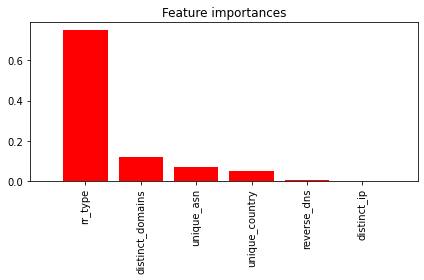

In [27]:
import matplotlib.pyplot as plt

# Now lets plot the feature importance to understand which features are more important
importances = model.feature_importances_

# get the names of the features
feature_names = X_train.columns.values

# sort the features by their importance score in descending order
indices = np.argsort(importances)[::-1]

# plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [28]:
# Now lets save the model
import joblib

# Save the model as a joblib file
joblib.dump(model, 'C:\\Users\\gaibo\\OneDrive\\Escritorio\\Python Projects\\DNS Traffic Control\\Out\\RandomForest_stateful.joblib')

['C:\\Users\\gaibo\\OneDrive\\Escritorio\\Python Projects\\DNS Traffic Control\\Out\\RandomForest_stateful.joblib']